In [ ]:
#multiple regression for the car pricing

import pandas as pd
df=pd.read_excel('cars.xls')

In [9]:
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [10]:
df.tail(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
794,18173.978084,5826,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,1
795,18490.983029,7755,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,1
796,17322.078404,10102,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,1
797,17978.356998,10986,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
798,16425.174796,14242,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [12]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [15]:
df.describe()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


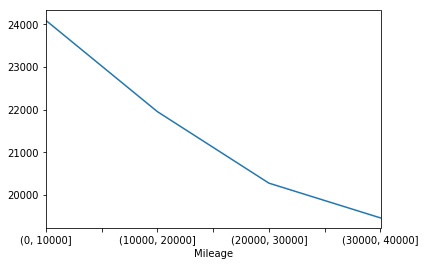

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df1=df[['Mileage', 'Price']]
bins=np.arange(0,50000,10000)
groups=df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=df[['Mileage','Cylinder','Doors']]
y=df['Price']
X[['Mileage','Cylinder','Doors']] = scale.fit_transform(X[['Mileage','Cylinder','Doors']].as_matrix())
X
est=sm.OLS(y,X).fit()
est.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:543:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           2.23e-11
Time:                        12:43:31   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [30]:
scaled=scale.transform([[45000,8,4]])
print(scaled)
predicted=est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]



# Activity
Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [35]:
scaled=scale.transform([[50000,10,6]])
print(scaled)
predicted=est.predict(scaled[0])
print(predicted)

[[3.6829755  3.41202286 2.91021717]]
[10290.94659732]
